# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data

# Find the table containing the temperature data
table = soup.find('table', class_='table')

if table:
    # Extract table headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract table rows
    rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
mars_temperature_data = []
# Loop through the scraped data to create a list of rows
if table:
    # Extract table headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract table rows
    rows = table.find_all('tr')

    # Process each row
    for row in rows[1:]:  # Skip the header row
        columns = row.find_all('td')
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        mars_temperature_data.append(row_data)
# Close the browser
browser.quit()

# Print the extracted data
print(mars_temperature_data)

[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_temperature_data)

In [14]:
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [17]:
# Change data types for data analysis
df['id'] = df['id'].astype(str)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [19]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?
mars_months = df['month'].unique()
num_mars_months = len(mars_months)
print(f"Number of months on Mars: {num_mars_months}")

Number of months on Mars: 12


In [23]:
#2 Count the number of Martian days (sols) in each month
sols_per_month = df['month'].value_counts().sort_index()
print(sols_per_month)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [24]:
# 3 How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_martian_days = df['sol'].nunique()
print(f"Number of Martian days in the dataset: {num_martian_days}")

Number of Martian days in the dataset: 1867


In [28]:
# 3. What is the average low temperature by month?
# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the results, sorted by month
print(avg_min_temp_by_month.sort_index())

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


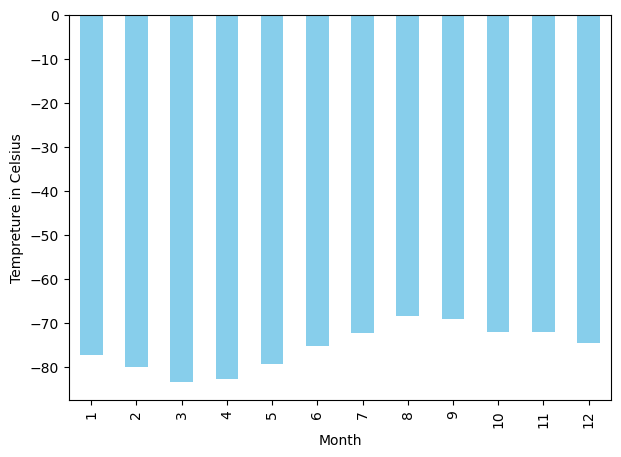

In [37]:
# Plot the average temperature by month
plt.figure(figsize=(7, 5))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Tempreture in Celsius')
plt.show()

In [38]:
# Find the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()

coldest_temp = avg_min_temp_by_month.min()
hottest_temp = avg_min_temp_by_month.max()

print(f"Coldest Month: {coldest_month} with an average temperature of {coldest_temp:.2f} °C")
print(f"Hottest Month: {hottest_month} with an average temperature of {hottest_temp:.2f} °C")

Coldest Month: 3 with an average temperature of -83.31 °C
Hottest Month: 8 with an average temperature of -68.38 °C


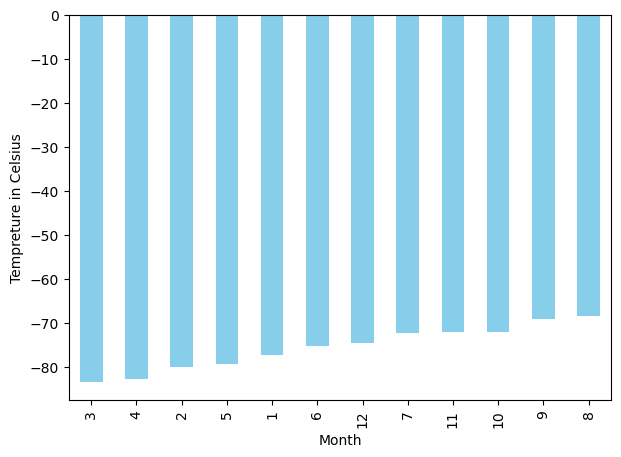

In [43]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the average temperatures in ascending order
sorted_avg_min_temp = avg_min_temp_by_month.sort_values(ascending=True)

# Plotting the average minimum temperature by month
sorted_avg_min_temp.plot(kind='bar', color='skyblue', figsize=(7, 5))
plt.xlabel('Month')
plt.ylabel('Tempreture in Celsius')
plt.show()

In [46]:
# 4. Average pressure by Martian month
# Group by month and calculate the average atmospheric pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

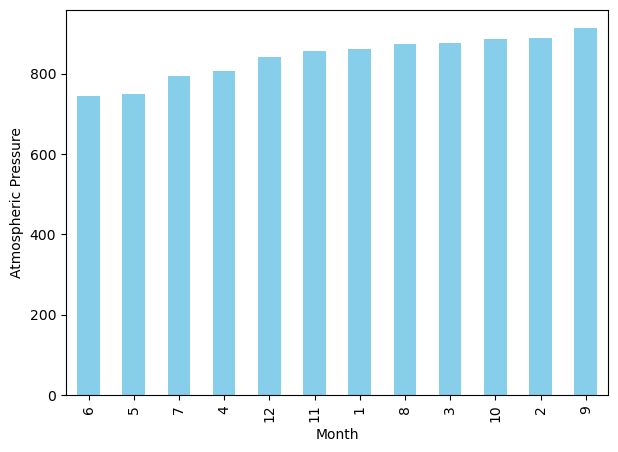

In [51]:
# Plot the average pressure by month
# Sort the average pressure in ascending order
sorted_avg_min_pressure = avg_pressure_by_month.sort_values(ascending=True)

# Plot the results
plt.figure(figsize=(7, 5))
sorted_avg_min_pressure.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [55]:
# Calculate the range of Ls values to estimate Martian year duration in sols
max_ls = df['ls'].max()
min_ls = df['ls'].min()

# Martian year is approximately 360 degrees of solar longitude

# Calculate the duration of the Martian year in sols
duration_sols = df[df['ls'] == max_ls]['sol'].values[0] - df[df['ls'] == min_ls]['sol'].values[0]
print(f"Duration of Martian Year in Sols: {duration_sols}")

# The length of a Martian year in Earth days
martian_year_in_earth_days = 687

# Calculate the average number of Earth days per Martian sol
average_sol_length_in_earth_days = martian_year_in_earth_days / duration_sols
print(f"Average Duration of a Martian Sol in Earth Days: {average_sol_length_in_earth_days:.2f}")

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = duration_sols * average_sol_length_in_earth_days
print(f"Estimated Number of Earth Days in a Martian Year: {earth_days_in_martian_year:.2f}")

Duration of Martian Year in Sols: -2
Average Duration of a Martian Sol in Earth Days: -343.50
Estimated Number of Earth Days in a Martian Year: 687.00


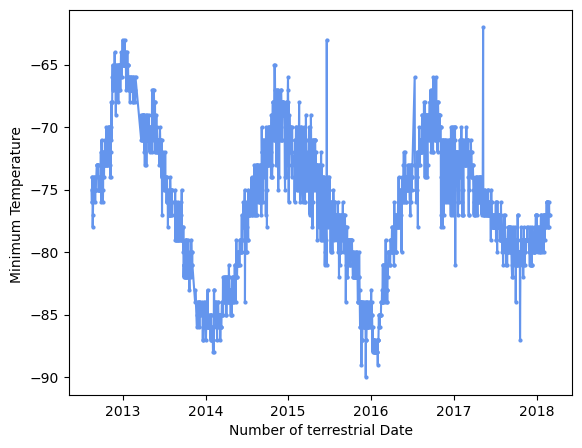

In [59]:
# Plot the daily minimum temperature over time
plt.figure(figsize=(6.5, 5))
plt.plot(df['terrestrial_date'], df['min_temp'], color='cornflowerblue', marker='o', linestyle='-', markersize=2)
plt.xlabel('Number of terrestrial Date')
plt.ylabel('Minimum Temperature ')
plt.show()

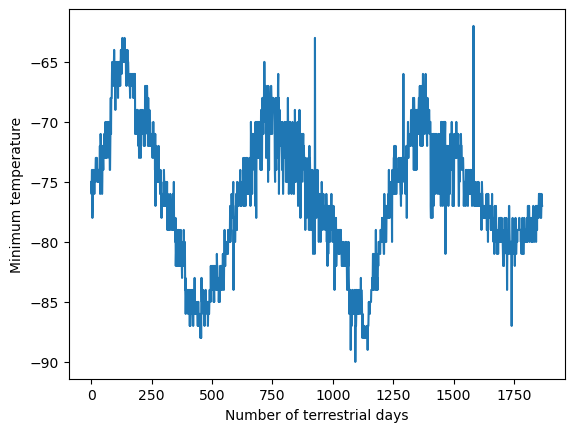

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)
print("DataFrame has been exported to 'mars_temperature_data.csv'.")

DataFrame has been exported to 'mars_temperature_data.csv'.


In [60]:
browser.quit()